### Analysis performed by Akanksha Rawat

In [1]:
import pandas as pd

# Load data

In [2]:
hospital_data = pd.read_csv('hospital_mortality.csv')
hospital_data.head(5)

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,...,1.0,NaN,NaN,36.0,3.1,900.0,1.8,0.0,NaN,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,...,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,...,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,...,4.0,NaN,NaN,107.0,1.9,600.0,3.6,0.0,NaN,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,...,1.0,NaN,NaN,12.0,2.0,204.0,1.0,0.0,NaN,0


### How many patients have 20 or more missing feature values? 

In [3]:
## Your code here
num_cols = len(hospital_data.columns)
row_values = hospital_data.apply(lambda x: x.count(), axis=1)

In [4]:
data_with_20_or_more_missing_values = hospital_data.loc[num_cols-row_values>=20]

In [5]:
print('Patients with 20 or more missing feature values:',len(data_with_20_or_more_missing_values))

Patients with 20 or more missing feature values: 210


### What’s the difference in means of HR_min for patients that died vs survived (not counting patients with HR_min of  0)?

In [6]:
## Your code here
hospital_data_non_0_HR_min = hospital_data[hospital_data.HR_Min!=0]

In [7]:
hospital_data_non_0_HR_min_died = hospital_data_non_0_HR_min[hospital_data_non_0_HR_min['In-hospital_death'] ==1]
hospital_data_non_0_HR_min_survived = hospital_data_non_0_HR_min[hospital_data_non_0_HR_min['In-hospital_death'] ==0]


In [8]:
diff_in_mean_HR_min_non_zero = hospital_data_non_0_HR_min_died['HR_Min'].mean() - hospital_data_non_0_HR_min_survived['HR_Min'].mean()

In [9]:
print('Difference in means of HR_min for patients that died vs survived')
print('(not counting patients with HR_min of 0): ', round(diff_in_mean_HR_min_non_zero,2))

Difference in means of HR_min for patients that died vs survived
(not counting patients with HR_min of 0):  1.67


### What is the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature?

In [10]:
## Your code here
hospital_data_temp_diff_2 = hospital_data[hospital_data['Temp_Max'] - hospital_data['Temp_Min'] >2]

In [11]:
print('Median Max Heart Rate for patients whose max temp was 2 degrees celsius higher than their min temp')
print(hospital_data_temp_diff_2['HR_Max'].median())

Median Max Heart Rate for patients whose max temp was 2 degrees celsius higher than their min temp
113.0


### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and age.

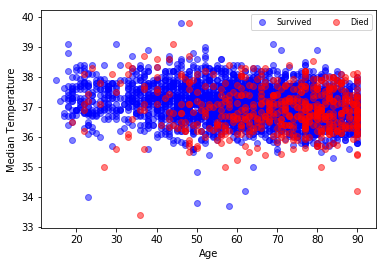

In [13]:
## Your code here
import matplotlib.pyplot as plt

s = plt.scatter(hospital_data[hospital_data['In-hospital_death']==0]['Age'],
                hospital_data[hospital_data['In-hospital_death']==0]['Temp_Median'], color='b',
                alpha=0.5)
d = plt.scatter(hospital_data[hospital_data['In-hospital_death']==1]['Age'],
                hospital_data[hospital_data['In-hospital_death']==1]['Temp_Median'], color='r',
               alpha=0.5)

plt.legend((s, d),
           ('Survived', 'Died'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.xlabel('Age')
plt.ylabel('Median Temperature')

plt.show()

### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and gender.

In [14]:
hospital_data['Gender'].value_counts()

 1.0    2246
 0.0    1751
-1.0       3
Name: Gender, dtype: int64

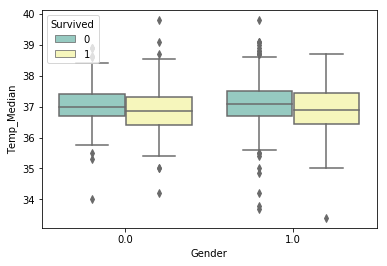

In [15]:
'''
Removing the observations corresponding to gender value of -1
'''
import seaborn as sns
hospital_data_correct_gender = hospital_data[hospital_data['Gender']!=-1]
plot2 = sns.boxplot(y= hospital_data_correct_gender['Temp_Median'],
                    x = hospital_data_correct_gender['Gender'],
                    hue=hospital_data['In-hospital_death'],
                    palette="Set3")
plt.legend(loc = 'upper left',)

leg = plot2.axes.get_legend()
new_title = 'Survived'
leg.set_title(new_title)
plot2
plt.show()

### Build and summarize the results of a machine learning model that predicts whether a patient dies or survives in the hospital. (We do not expect a perfect or highest-accuracy solution; this is primarily an opportunity for you to show your machine learning project workflow and to document your thought process, approach to solving problems, and interpretation of results.)

### Importing Packages

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Data Cleaning

In [17]:

hospital_data_clean = hospital_data.dropna()
hospital_data_clean.reset_index()
hospital_data_clean_feature = hospital_data_clean.iloc[:,:-1]
hospital_data_clean_target = hospital_data_clean['In-hospital_death']



### Balancing the imbalanced data using SMOTE

In [18]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(hospital_data_clean_feature, hospital_data_clean_target)

### Splitting the data into Test and Train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size =0.2 )

In [20]:
X_train.shape

(3288, 110)

In [21]:
pd.Series(y_train).value_counts()

1    1668
0    1620
dtype: int64

In [22]:
pd.Series(y_test).value_counts()

0    435
1    387
dtype: int64

### Tuning the hyperparameter - k (# of Nearest Neighbor) using 5 fold CV on Recall Score 

In [23]:
num_folds = 5
k_fold = KFold(num_folds, shuffle=True, random_state = 0)

# Potentail values of K
param_values = [1, 2, 5, 10, 25, 100, 1000]

cross_val_scores = []

for p in param_values:
    
    print("k = " + str(p))
    fold_scores = []
    for k,(train_index,val_index) in enumerate(k_fold.split(X_train,y_train)):
        s = train_index
        t = val_index
        neig = KNeighborsClassifier(n_neighbors = p)
        neig.fit(X_train[train_index], y_train[train_index])
        ypred = neig.predict(X_train[val_index])
        yval = y_train[val_index]
        
        acc = recall_score(yval,ypred)
        
        fold_scores.append(acc)
        
        print("\t[fold {0}] k: {1:.5f}, accuracy: {2:.5f}".format(k, p, acc))

    cross_val_scores.append(np.mean(fold_scores))
    
best_k_index = np.argmax(cross_val_scores)
best_k = param_values[best_k_index]
print("Best K: " + str(best_k) + " with score: " + str(cross_val_scores[best_k_index]))


k = 1
	[fold 0] k: 1.00000, accuracy: 0.98841
	[fold 1] k: 1.00000, accuracy: 0.98784
	[fold 2] k: 1.00000, accuracy: 0.95808
	[fold 3] k: 1.00000, accuracy: 0.98507
	[fold 4] k: 1.00000, accuracy: 0.97231
k = 2
	[fold 0] k: 2.00000, accuracy: 0.94493
	[fold 1] k: 2.00000, accuracy: 0.93313
	[fold 2] k: 2.00000, accuracy: 0.91317
	[fold 3] k: 2.00000, accuracy: 0.93433
	[fold 4] k: 2.00000, accuracy: 0.93538
k = 5
	[fold 0] k: 5.00000, accuracy: 0.95942
	[fold 1] k: 5.00000, accuracy: 0.94833
	[fold 2] k: 5.00000, accuracy: 0.96407
	[fold 3] k: 5.00000, accuracy: 0.93731
	[fold 4] k: 5.00000, accuracy: 0.94154
k = 10
	[fold 0] k: 10.00000, accuracy: 0.87826
	[fold 1] k: 10.00000, accuracy: 0.87842
	[fold 2] k: 10.00000, accuracy: 0.88024
	[fold 3] k: 10.00000, accuracy: 0.86269
	[fold 4] k: 10.00000, accuracy: 0.87077
k = 25
	[fold 0] k: 25.00000, accuracy: 0.83188
	[fold 1] k: 25.00000, accuracy: 0.82371
	[fold 2] k: 25.00000, accuracy: 0.83533
	[fold 3] k: 25.00000, accuracy: 0.82090

### Fitting the model on training data on the tuned hyperparameter

In [24]:
neig = KNeighborsClassifier(n_neighbors = best_k)
neig.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions on the test data

In [25]:
ypred = neig.predict(X_test)


### Accuracy Metrices on the Test Data 

#### 1. Accuracy Score

In [26]:
acc = accuracy_score(y_test,ypred)
acc

0.851581508515815

In [27]:
print('Interpretation:')
print('Overall % of correct classification in the test data is ', round(acc*100,2),'%')

Interpretation:
Overall % of correct classification in the test data is  85.16 %


#### 2. Recall Score

In [28]:
rec_score = recall_score(y_test,ypred)
rec_score

0.9896640826873385

In [29]:
print('Interpretation:')
print('Of all the patients who died in the hospital ', round(rec_score*100,2),'% have been correctly classified')

Interpretation:
Of all the patients who died in the hospital  85.16 % have been correctly classified


#### 3. Precision Score

In [30]:
pre_score = precision_score(y_test, ypred)
pre_score

0.7644710578842315

In [31]:
print('Interpretation:')
print('Of all the patients who have been classfied as "In-hospital Death"', round(pre_score*100,2),'% have been correctly classified')

Interpretation:
Of all the patients who have been classfied as "In-hospital Death" 76.45 % have been correctly classified


#### 4. F1- Score

In [32]:
f1_sc = f1_score(y_test,ypred)
f1_sc

0.8626126126126126

In [33]:
print('Interpretation:')
print('The harmonic mean of precision and recall is ', round(f1_sc*100,2))

Interpretation:
The harmonic mean of precision and recall is  86.26
